In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler

!git clone https://github.com/taehojo/data.git

df = pd.read_csv('./data/pima-indians-diabetes3.csv')

X = df.iloc[:,0:8]
y = df.iloc[:,8]

fatal: destination path 'data' already exists and is not an empty directory.


In [ ]:
# 스케일링
ss = StandardScaler()
scaled_X = pd.DataFrame(ss.fit_transform(X), columns=X.columns)

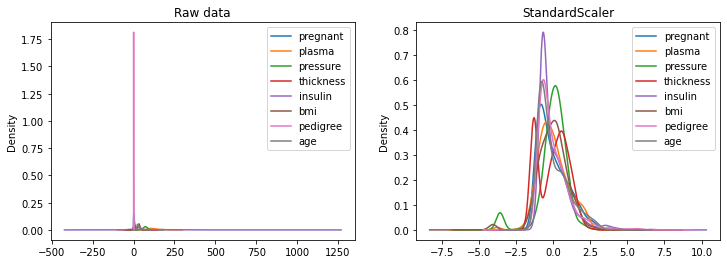

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(12,4))
X.plot(kind='kde', title='Raw data', ax=ax[0])
scaled_X.plot(kind='kde', title='StandardScaler', ax=ax[1])
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

In [ ]:
# 결정 트리
# '예/아니요'라는 답이 나오는 질문을 계속해서 물으며 학습하는 방법
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

skf = StratifiedKFold(n_splits=10, shuffle=True)

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 68.52 %
Standard Deviation: 7.68 %


In [ ]:
# 랜덤 포레스트
# 많은 수의 결정 트리를 실행해 그로부터 나온 분류 결과를 취합해서 최종 예측을 하는 알고리즘
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=50)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

skf = StratifiedKFold(n_splits=10, shuffle=True)

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 75.15 %
Standard Deviation: 5.19 %


In [ ]:
# 가우시안 나이브 베이즈
# 속성이 연속형 변수일 때, 베이즈 정리를 기반으로 각 범주에 속할 확률을 계산하는 방법
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
                      
skf = StratifiedKFold(n_splits=10, shuffle=True)

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 75.18 %
Standard Deviation: 5.68 %


In [ ]:
# k-최근접 이웃
# 새로운 데이터가 입력되면 가장 가까이 있는 것을 중심으로 새로운 데이터의 종류를 정해주는 것

from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

skf = StratifiedKFold(n_splits=10, shuffle=True)

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 69.63 %
Standard Deviation: 4.63 %


In [ ]:
# 에이다 부스트
# 여러 번의 분류를 통해 정답을 예측해가는 알고리즘

from sklearn.ensemble import AdaBoostClassifier

classifier = AdaBoostClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

skf = StratifiedKFold(n_splits=10, shuffle=True)

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 73.59 %
Standard Deviation: 4.74 %


In [ ]:
# 이차 판별 분석
# 각 클래스 간의 경계를 결정해 분류하는 방법
# 각 클래스 분포의 중심가 모양을 결정하고 클래스 사이의 경계를 그려냄
# 경계가 직선이면 선형 판별 분석, 2차 방적식에 의한 곡선이면 이차 판별 분석

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifier = QuadraticDiscriminantAnalysis()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

skf = StratifiedKFold(n_splits=10, shuffle=True)

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 73.08 %
Standard Deviation: 4.47 %


In [ ]:
# 서포트 벡터 머신
# 분류를 위한 기준선을 정의하는 모델

from sklearn.svm import SVC

classifier = SVC(kernel='linear')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

skf = StratifiedKFold(n_splits=10, shuffle=True)

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 76.23 %
Standard Deviation: 5.66 %


In [ ]:
# 서포트 백터 머신 - RBF 커널
# 주어진 데이터가 선형으로 분리될 수 없는 경우를 해결하기 위해 만들어짐

from sklearn.svm import SVC

classifier = SVC(kernel='rbf')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

skf = StratifiedKFold(n_splits=10, shuffle=True)

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 74.47 %
Standard Deviation: 4.23 %


In [ ]:
# 보팅
# 여러 가지 다른 유형의 알고리즘을 같은 데이터셋에 적용해 학습하는 방법
# 학습한 결과를 모아 다수의 분류기가 결정한 결과를 선택하거나 
# 클래스별 평균을 종합해 예측

from sklearn.ensemble import VotingClassifier

clf1 = AdaBoostClassifier()
clf2 = RandomForestClassifier()
clf3 = SVC(kernel='linear')
classifier = VotingClassifier(estimators = [('lr', clf1), ('rf', clf2),('gnb',clf3)])
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

skf = StratifiedKFold(n_splits=10, shuffle=True)

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 73.26 %
Standard Deviation: 3.99 %


In [ ]:
# 배깅
# 데이터 세트를 여러 개로 분리해 분류를 실행하는 방법

from sklearn.ensemble import BaggingClassifier

classifier = BaggingClassifier(base_estimator=SVC(kernel='rbf'), n_estimators=10)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

skf = StratifiedKFold(n_splits=10, shuffle=True)

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 74.32 %
Standard Deviation: 3.60 %


Mean accuracy of D_tree : 67.02 %
Mean accuracy of RF : 73.98 %
Mean accuracy of GNB : 75.72 %
Mean accuracy of KNN : 69.61 %
Mean accuracy of Ada : 75.37 %
Mean accuracy of QDA : 73.43 %
Mean accuracy of SVM_l : 72.08 %
Mean accuracy of SVM_k : 71.90 %
Mean accuracy of Voting : 74.15 %
Mean accuracy of Bagging : 76.21 %


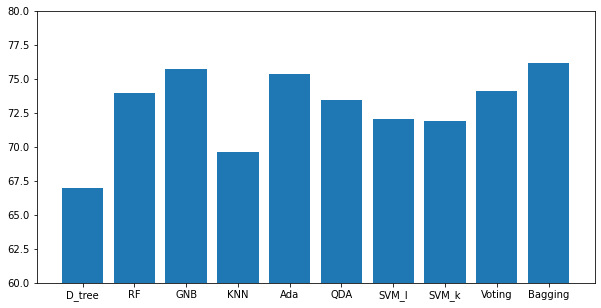

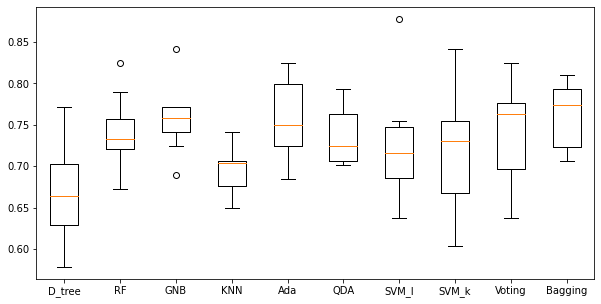

In [ ]:
# 여러 알고리즘의 성능 한눈에 비교하기
# 사용할 분류기를 모두 지정합니다.
classifiers = [DecisionTreeClassifier(),
               RandomForestClassifier(),
               GaussianNB(),
               KNeighborsClassifier(),
               SVC(kernel = 'linear'),
               SVC(kernel = 'rbf'),
               AdaBoostClassifier(),
               QuadraticDiscriminantAnalysis(),
               VotingClassifier(estimators=[('1', AdaBoostClassifier()), 
                                            ('2', RandomForestClassifier()), 
                                            ('3', SVC(kernel = 'linear'))]),
               BaggingClassifier(base_estimator=clf3, n_estimators=10, random_state=0)
              ]

# 각 분류기의 이름을 지정합니다. 
classifier_names = ['D_tree',
                    'RF', 
                    'GNB', 
                    'KNN', 
                    'Ada',
                    'QDA',
                    'SVM_l',
                    'SVM_k',
                    'Voting',
                    'Bagging'
                   ]

# 결과가 저장될 리스트를 만듭니다.
modelaccuracies = []
modelmeans = []
modelnames = []

# 각 분류기를 실행하여 결과를 저장합니다. 
classifier_data=zip(classifier_names, classifiers)
for classifier_name, classifier in classifier_data:
    # 계층별 교차 검증 환경을 설정합니다. 
    skf=StratifiedKFold(n_splits=10, shuffle=True)
    # 교차 검증을 통해 정확도를 계산합니다. 
    accuracies=cross_val_score(classifier, X = X_train, y = y_train, cv = skf)
    # 정확도의 평균값을 출력합니다.
    print("Mean accuracy of", classifier_name, ": {:.2f} %".format(accuracies.mean()*100))
    # 결과를 저장합니다.
    modelaccuracies.append(accuracies)
    modelnames.append(classifier_name)
    modelmeans.append(accuracies.mean()*100)  

# 각 분류기별 정확도의 평균값을 막대 그래프로 출력합니다.
plt.figure(figsize=(10,5))    
plt.ylim([60, 80])
plt.bar(modelnames, modelmeans);

# 각 분류기별 결과를 Box 그래프로 출력합니다.
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.boxplot(modelaccuracies)
ax.set_xticklabels(modelnames)
plt.show()